For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:


In [2]:
#pip install vega_datasets

In [3]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)


from vega_datasets import data

In [4]:
data.sf_temps()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00
...,...,...
8754,50.40,2010-12-31 19:00:00
8755,49.90,2010-12-31 20:00:00
8756,49.40,2010-12-31 21:00:00
8757,48.80,2010-12-31 22:00:00


In [5]:
sf_temps = data.sf_temps()

In [6]:
sf_temps.head(2)

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00


In [7]:
sf_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


Use the above dataset for the exercises below:

# 1. Resample by the day and take the average temperature. 
- Visualize the average temperature over time.

In [8]:
sf_temps = sf_temps.set_index('date').sort_index()

In [9]:
sf_temps.head()

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00


In [10]:
sf_temps.resample('D').mean()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


<AxesSubplot:xlabel='date'>

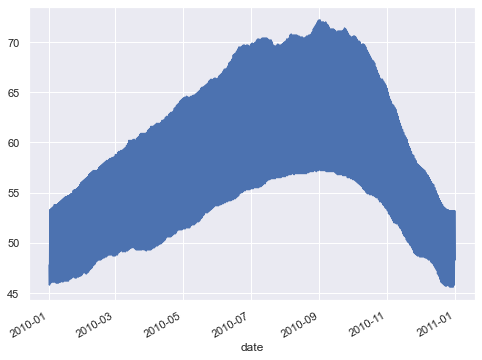

In [11]:
sf_temps.temp.plot()

<AxesSubplot:xlabel='date'>

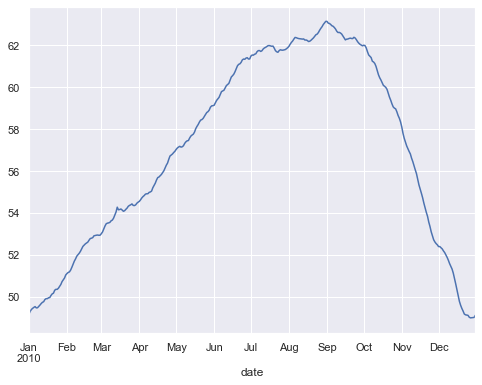

In [12]:
(sf_temps.resample('D').mean()).temp.plot()

# 2. Write the code necessary to visualize the minimum temperature over time.

In [13]:
sf_temps.shape

(8759, 1)

<AxesSubplot:xlabel='date'>

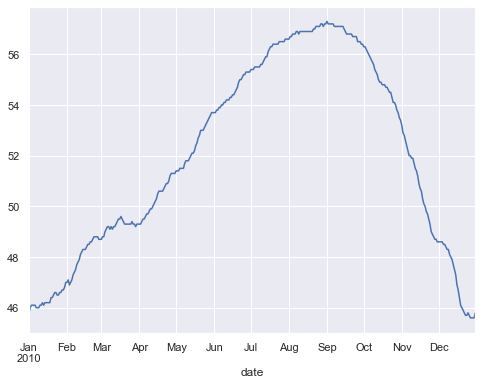

In [14]:
(sf_temps.resample('D').min()).temp.plot()

# 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

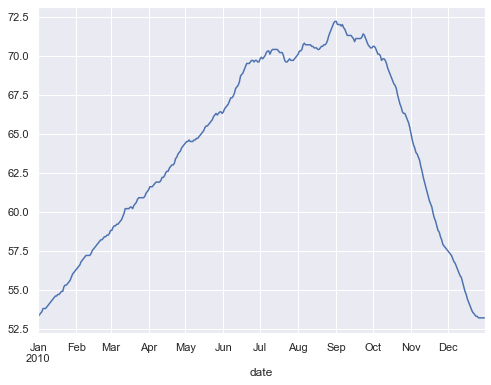

In [15]:
(sf_temps.resample('D').max()).temp.plot()

# 4. Which month is the coldest, on average?

In [37]:
sf_temps.resample('M').mean()

,temp
date,
2010-01-31,49.98
2010-02-28,52.24
2010-03-31,53.96
2010-04-30,55.63
2010-05-31,57.97
2010-06-30,60.44
2010-07-31,61.77
2010-08-31,62.41
2010-09-30,62.49


In [38]:
(sf_temps.resample('M').mean()).nsmallest(1, 'temp')

,temp
date,
2010-01-31,49.98


### Jan 2010 is the coldest on avg with 49.98°
___

In [17]:
#(sf_temps.resample('M').min()).nsmallest(1, 'temp')

,temp
date,
2010-12-31,45.60


# 5. Which month has the highest average temperature?

In [39]:
(sf_temps.resample('M').mean()).nlargest(1, 'temp')

,temp
date,
2010-09-30,62.49


### Sept 2010 is the hottest month with an avg of 62.49°
___

# 6. Resample by the day and calculate the min and max temp for the day 
(Hint: `.agg(['min', 'max'])`). 
- Use this resampled dataframe to calculate the change in temperature for the day. 
- Which month has the highest daily temperature variability?

In [19]:
sf_temps.resample('D').agg(['min', 'max'])

temp      
             min   max
date                  
2010-01-01 45.80 53.30
2010-01-02 46.00 53.40
2010-01-03 46.10 53.50
2010-01-04 46.10 53.60
2010-01-05 46.10 53.80
...          ...   ...
2010-12-27 45.60 53.20
2010-12-28 45.60 53.20
2010-12-29 45.60 53.20
2010-12-30 45.60 53.20
2010-12-31 45.80 53.20

[365 rows x 2 columns]

In [26]:
sf_daily_minmax = sf_temps.temp.resample('D').agg(['min', 'max'])

In [21]:
sf_daily_minmax.max() - sf_daily_minmax.min()

temp  min   11.70
      max   19.00
dtype: float64

In [27]:
sf_daily_minmax

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40
2010-01-03,46.10,53.50
2010-01-04,46.10,53.60
2010-01-05,46.10,53.80
...,...,...
2010-12-27,45.60,53.20
2010-12-28,45.60,53.20
2010-12-29,45.60,53.20


In [28]:
sf_daily_minmax['temp_variance'] = sf_daily_minmax['max'] - sf_daily_minmax['min']

In [29]:
sf_daily_minmax

,min,max,temp_variance
date,,,
2010-01-01,45.80,53.30,7.50
2010-01-02,46.00,53.40,7.40
2010-01-03,46.10,53.50,7.40
2010-01-04,46.10,53.60,7.50
2010-01-05,46.10,53.80,7.70
...,...,...,...
2010-12-27,45.60,53.20,7.60
2010-12-28,45.60,53.20,7.60
2010-12-29,45.60,53.20,7.60


In [134]:
(sf_daily_minmax.resample('M').temp_variance.max()).nlargest(1)

date
2010-08-31   15.00
Freq: M, Name: temp_variance, dtype: float64

### Aug 2010 has the highest daily temp variance with 15
___

# 7. **Bonus**: Visualize the daily min, average, and max temperature over time on a single line plot, 
i.e. the min, average, and maximum temperature should be 3 seperate lines.

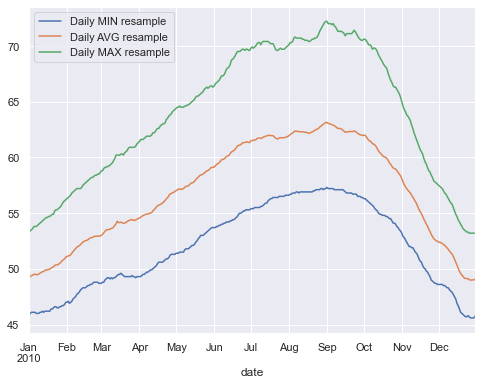

In [34]:
#df.Close.plot(label = 'raw data')
sf_temps.resample('D').min().temp.plot(label = 'Daily MIN resample')
sf_temps.resample('D').mean().temp.plot(label = 'Daily AVG resample')
sf_temps.resample('D').max().temp.plot(label = 'Daily MAX resample')
plt.legend();

___

In [35]:
data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.60,4.40,1.70,2.90,fog
1457,2015-12-28,1.50,5.00,1.70,1.30,fog
1458,2015-12-29,0.00,7.20,0.60,2.60,fog
1459,2015-12-30,0.00,5.60,-1.00,3.40,sun


In [36]:
seaw = data.seattle_weather()

In [40]:
seaw = seaw.set_index('date').sort_index()

In [41]:
seaw.head(2)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain


Use the dataset to answer the following questions:

# 1. Which year and month combination has the highest amount of precipitation?

In [135]:
seaw.resample('M').sum()

,precipitation,temp_max,temp_min,wind,sunny,rainy,precip_gt_zero
date,,,,,,,
2012-01-31,173.30,218.70,47.80,120.90,4,20,22
2012-02-29,92.30,269.00,92.90,113.20,8,18,19
2012-03-31,183.00,296.20,88.00,131.70,6,20,22
2012-04-30,68.10,446.20,179.80,101.20,8,21,17
2012-05-31,52.20,547.50,253.90,104.00,14,17,10
2012-06-30,75.10,560.80,314.40,92.50,10,20,14
2012-07-31,26.30,710.10,400.90,89.20,12,18,7
2012-08-31,0.00,801.60,434.30,87.70,24,7,0
2012-09-30,0.90,686.40,337.30,79.40,18,9,3


In [136]:
seaw.asfreq("M").precipitation.sum()

164.8

In [137]:
(seaw.resample('M').precipitation.sum())

date
2012-01-31   173.30
2012-02-29    92.30
2012-03-31   183.00
2012-04-30    68.10
2012-05-31    52.20
2012-06-30    75.10
2012-07-31    26.30
2012-08-31     0.00
2012-09-30     0.90
2012-10-31   170.30
2012-11-30   210.50
2012-12-31   174.00
2013-01-31   105.70
2013-02-28    40.30
2013-03-31    69.70
2013-04-30   149.60
2013-05-31    60.50
2013-06-30    33.10
2013-07-31     0.00
2013-08-31    34.40
2013-09-30   156.80
2013-10-31    39.20
2013-11-30    96.30
2013-12-31    42.40
2014-01-31    94.00
2014-02-28   155.20
2014-03-31   240.00
2014-04-30   106.10
2014-05-31    80.00
2014-06-30    18.80
2014-07-31    19.60
2014-08-31    46.00
2014-09-30    56.70
2014-10-31   171.50
2014-11-30   123.10
2014-12-31   121.80
2015-01-31    93.00
2015-02-28   134.20
2015-03-31   113.50
2015-04-30    51.60
2015-05-31    14.80
2015-06-30     5.90
2015-07-31     2.30
2015-08-31    83.30
2015-09-30    21.10
2015-10-31   122.40
2015-11-30   212.60
2015-12-31   284.50
Freq: M, Name: precipitation, dtype

In [138]:
(seaw.resample('M').precipitation.sum()).nlargest(1)

date
2015-12-31   284.50
Freq: M, Name: precipitation, dtype: float64

## Dec 2015 had the most precipitation with 284.5".
___

# 2. Visualize the amount of monthly precipitation over time.

In [51]:
seaw.resample('M').sum()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-31,173.30,218.70,47.80,120.90
2012-02-29,92.30,269.00,92.90,113.20
2012-03-31,183.00,296.20,88.00,131.70
2012-04-30,68.10,446.20,179.80,101.20
2012-05-31,52.20,547.50,253.90,104.00
2012-06-30,75.10,560.80,314.40,92.50
2012-07-31,26.30,710.10,400.90,89.20
2012-08-31,0.00,801.60,434.30,87.70
2012-09-30,0.90,686.40,337.30,79.40


Text(0.5, 1.0, 'Monthly Precipitation Over Time')

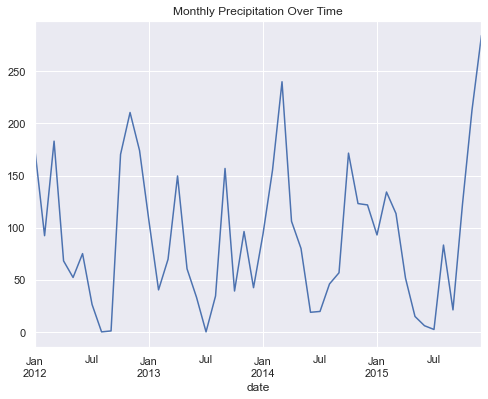

In [53]:
seaw.resample('M').sum().precipitation.plot()
plt.title("Monthly Precipitation Over Time")

# 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

Text(0.5, 1.0, 'Average Wind Over Time')

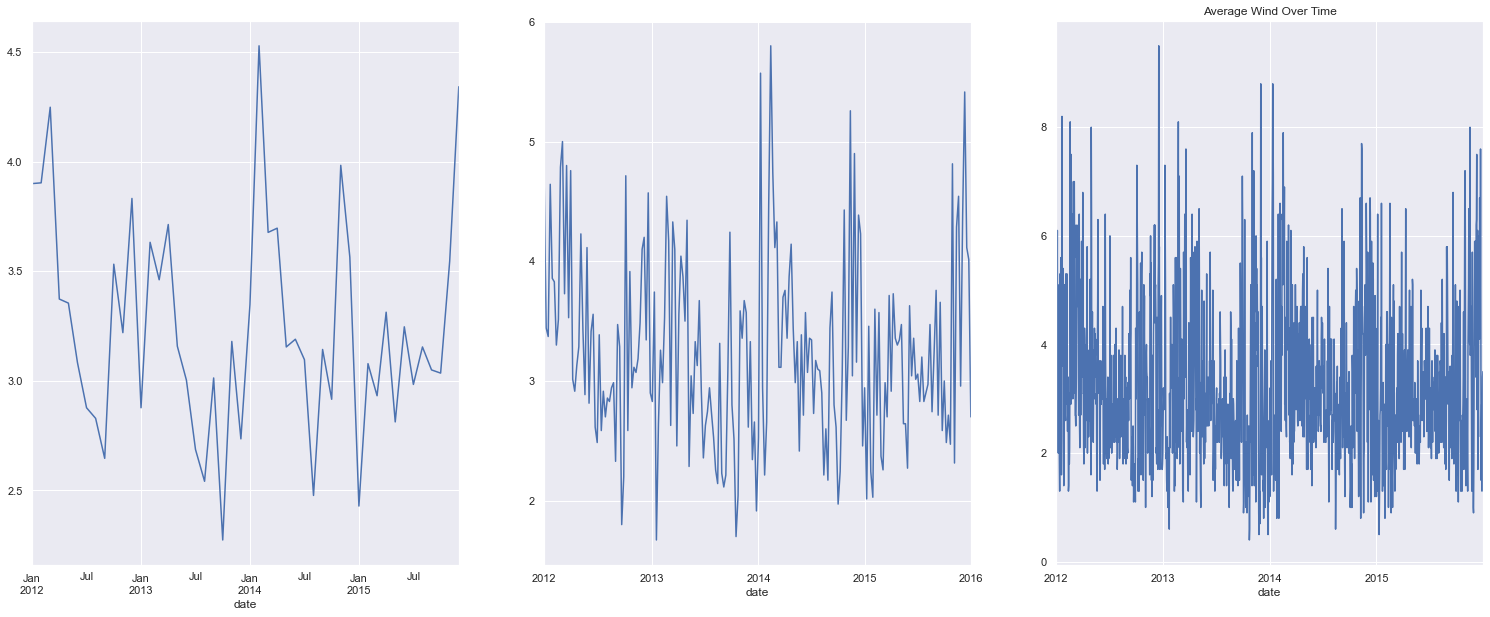

In [57]:
plt.figure(figsize=(26, 10))
plt.subplot(131)
seaw.resample('M').mean().wind.plot(label = "Monthly Avg Wind")

plt.subplot(132)
seaw.resample('W').mean().wind.plot(label = "Weekly Avg Wind")

plt.subplot(133)
seaw.resample('D').mean().wind.plot(label = "Daily Avg Wind")

plt.title("Average Wind Over Time")

Text(0.5, 1.0, 'Average Wind Over Time')

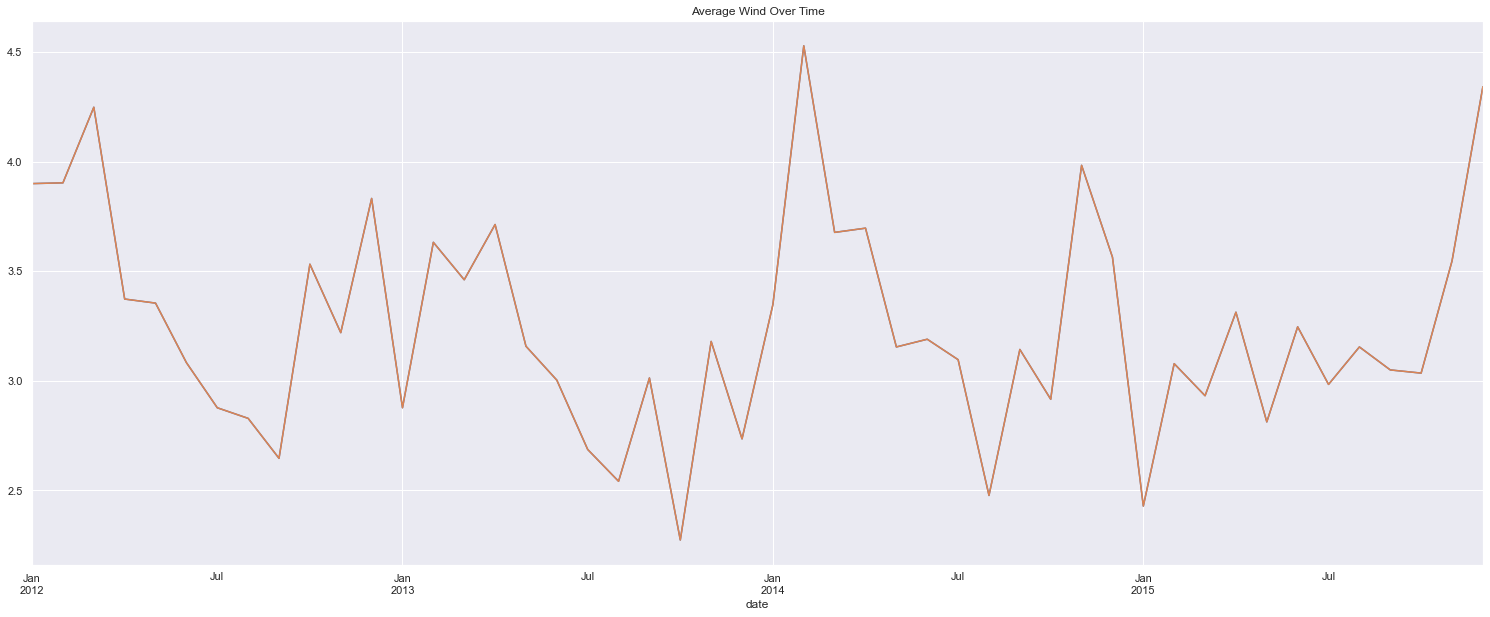

In [67]:
plt.figure(figsize=(26, 10))

seaw.resample('M').mean().wind.plot(label = "Monthly Avg Wind")
seaw.resample('M').wind.mean().plot(label = "Monthly Avg Wind")


plt.title("Average Wind Over Time")

# 4. Which year-month combination is the windiest?

In [60]:
(seaw.resample('M').wind.mean())

date
2012-01-31   3.90
2012-02-29   3.90
2012-03-31   4.25
2012-04-30   3.37
2012-05-31   3.35
2012-06-30   3.08
2012-07-31   2.88
2012-08-31   2.83
2012-09-30   2.65
2012-10-31   3.53
2012-11-30   3.22
2012-12-31   3.83
2013-01-31   2.88
2013-02-28   3.63
2013-03-31   3.46
2013-04-30   3.71
2013-05-31   3.16
2013-06-30   3.00
2013-07-31   2.69
2013-08-31   2.54
2013-09-30   3.01
2013-10-31   2.27
2013-11-30   3.18
2013-12-31   2.74
2014-01-31   3.35
2014-02-28   4.53
2014-03-31   3.68
2014-04-30   3.70
2014-05-31   3.15
2014-06-30   3.19
2014-07-31   3.10
2014-08-31   2.48
2014-09-30   3.14
2014-10-31   2.92
2014-11-30   3.98
2014-12-31   3.56
2015-01-31   2.43
2015-02-28   3.08
2015-03-31   2.93
2015-04-30   3.31
2015-05-31   2.81
2015-06-30   3.25
2015-07-31   2.98
2015-08-31   3.15
2015-09-30   3.05
2015-10-31   3.04
2015-11-30   3.55
2015-12-31   4.34
Freq: M, Name: wind, dtype: float64

In [116]:
(seaw.resample('A').wind.mean())

date
2012-12-31   3.40
2013-12-31   3.02
2014-12-31   3.39
2015-12-31   3.16
Freq: A-DEC, Name: wind, dtype: float64

In [63]:
(seaw.resample('M').wind.mean()).nlargest(1)

date
2014-02-28   4.53
Freq: M, Name: wind, dtype: float64

## Feb. 2014 was on average, the windiest
___

# 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [68]:
seaw.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


In [72]:
np.where(seaw.weather == 'sun', 1, 0)

array([0, 0, 0, ..., 0, 1, 1])

In [74]:
seaw["sunny"] = np.where(seaw.weather == 'sun', 1, 0)

In [75]:
seaw.head(2)

,precipitation,temp_max,temp_min,wind,weather,sunny
date,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,0
2012-01-02,10.90,10.60,2.80,4.50,rain,0


In [78]:
seaw.resample('A').sunny.sum().nlargest(1)

date
2014-12-31    211
Freq: A-DEC, Name: sunny, dtype: int64

## 2014 was the sunniest with 211 days
___

# 6. In which month does it rain the most?

In [79]:
seaw.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [83]:
np.where((seaw.weather == 'rain') | (seaw.weather == 'drizzle'), 1, 0)

array([1, 1, 1, ..., 0, 0, 0])

In [84]:
seaw["rainy"] = np.where((seaw.weather == 'rain') | (seaw.weather == 'drizzle'), 1, 0)

In [85]:
seaw.head(2)

,precipitation,temp_max,temp_min,wind,weather,sunny,rainy
date,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,0,1
2012-01-02,10.90,10.60,2.80,4.50,rain,0,1


In [122]:
seaw.resample('M').rainy.sum()

date
2012-01-31    20
2012-02-29    18
2012-03-31    20
2012-04-30    21
2012-05-31    17
2012-06-30    20
2012-07-31    18
2012-08-31     7
2012-09-30     9
2012-10-31    20
2012-11-30    27
2012-12-31    25
2013-01-31    24
2013-02-28    26
2013-03-31    20
2013-04-30     2
2013-05-31     0
2013-06-30     0
2013-07-31     1
2013-08-31     1
2013-09-30     0
2013-10-31     1
2013-11-30     1
2013-12-31     0
2014-01-31     0
2014-02-28     0
2014-03-31     0
2014-04-30     0
2014-05-31     0
2014-06-30     0
2014-07-31     1
2014-08-31     1
2014-09-30     0
2014-10-31     1
2014-11-30     0
2014-12-31     0
2015-01-31     1
2015-02-28     0
2015-03-31     0
2015-04-30     1
2015-05-31     0
2015-06-30     1
2015-07-31     2
2015-08-31     5
2015-09-30     0
2015-10-31     2
2015-11-30     0
2015-12-31     0
Freq: M, Name: rainy, dtype: int64

In [123]:
seaw.resample('M').rainy.sum().nlargest(1)

date
2012-11-30    27
Freq: M, Name: rainy, dtype: int64

## Nov 2012 was the rainiest with 27 days
___

# 7. Which month has the most number of days with a non-zero amount of precipitation?

In [88]:
np.where((seaw.precipitation > 0), 1, 0)

array([0, 1, 1, ..., 0, 0, 0])

In [89]:
seaw['precip_gt_zero'] = np.where((seaw.precipitation > 0), 1, 0)

In [90]:
seaw.head()

,precipitation,temp_max,temp_min,wind,weather,sunny,rainy,precip_gt_zero
date,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,0,1,0
2012-01-02,10.90,10.60,2.80,4.50,rain,0,1,1
2012-01-03,0.80,11.70,7.20,2.30,rain,0,1,1
2012-01-04,20.30,12.20,5.60,4.70,rain,0,1,1
2012-01-05,1.30,8.90,2.80,6.10,rain,0,1,1


In [91]:
seaw.resample('m').precip_gt_zero.sum()

date
2012-01-31    22
2012-02-29    19
2012-03-31    22
2012-04-30    17
2012-05-31    10
2012-06-30    14
2012-07-31     7
2012-08-31     0
2012-09-30     3
2012-10-31    16
2012-11-30    20
2012-12-31    27
2013-01-31    17
2013-02-28    18
2013-03-31    15
2013-04-30    16
2013-05-31    12
2013-06-30    10
2013-07-31     0
2013-08-31     9
2013-09-30    14
2013-10-31    12
2013-11-30    15
2013-12-31    14
2014-01-31    13
2014-02-28    19
2014-03-31    20
2014-04-30    13
2014-05-31     8
2014-06-30     9
2014-07-31     2
2014-08-31     7
2014-09-30     9
2014-10-31    19
2014-11-30    16
2014-12-31    15
2015-01-31    14
2015-02-28    17
2015-03-31    16
2015-04-30    13
2015-05-31     4
2015-06-30     4
2015-07-31     2
2015-08-31     6
2015-09-30     9
2015-10-31    14
2015-11-30    20
2015-12-31    25
Freq: M, Name: precip_gt_zero, dtype: int64

In [92]:
seaw.resample('m').precip_gt_zero.sum().nlargest(1)

date
2012-12-31    27
Freq: M, Name: precip_gt_zero, dtype: int64

## Dec 2012 had the most number of days with non-zero amounts of precipitation totalling 27.
___

In [93]:
data.flights_20k()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


# 1. Convert any negative delays to 0.

In [94]:
flight = data.flights_20k()

In [95]:
flight = flight.set_index('date').sort_index()

In [96]:
flight.head(2)

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI


In [98]:
np.where(flight.delay < 0, 0, flight.delay)

array([14,  0,  0, ...,  0, 30,  0])

In [107]:
#flight = flight.drop(columns='delay_conv', axis=1)

In [108]:
flight['delay'] = np.where(flight.delay < 0, 0, flight.delay)

In [109]:
flight.head(2)

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI


# 2. Which *hour* of the day has the highest average delay?

In [130]:
flight.resample('H').delay.mean()

date
2001-01-01 00:00:00   14.00
2001-01-01 01:00:00     nan
2001-01-01 02:00:00     nan
2001-01-01 03:00:00     nan
2001-01-01 04:00:00     nan
                       ... 
2001-03-31 17:00:00   11.67
2001-03-31 18:00:00   12.54
2001-03-31 19:00:00   22.12
2001-03-31 20:00:00   27.60
2001-03-31 21:00:00   11.20
Freq: H, Name: delay, Length: 2158, dtype: float64

In [125]:
flight.resample('H').delay.mean().nlargest(1)

date
2001-02-23 03:00:00   360.00
Name: delay, dtype: float64

In [131]:
flight['hour'] = flight.index.hour

In [132]:
flight.head(2)

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6


In [139]:
flight.groupby('hour').delay.mean()

hour
0    127.92
1    170.00
3    302.50
5      0.51
6      2.49
7      3.07
8      4.03
9      5.00
10     5.85
11     7.36
12     9.21
13    11.45
14    10.75
15    13.14
16    13.88
17    13.20
18    14.51
19    16.26
20    17.89
21    21.63
22    32.70
23    65.35
Name: delay, dtype: float64

In [140]:
(flight.groupby('hour').delay.mean()).nlargest(1)

hour
3   302.50
Name: delay, dtype: float64

## 3am has the highest avg delay.
___

# 3. Does the day of the week make a difference in the delay amount?

# 4. Does the month make a difference in the delay amount?

# BONUS

In [ ]:
data.iowa_electricity()

# 1. For each row, calculate the percentage of the year's total that energy source provided.
# 2. Lineplot of generation over time, color by source
# 3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
# 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
# 5. Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
- Express each number as a % of the year's total

# 1. Use the sf_temps dataset
# 2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
# 3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
# 4. Create pretty labels for time plots
# 5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

Explore the `birdstrikes` dataset.

In [ ]:
df = data.birdstrikes()